# Project IronFox MK I

This project is a sequel to Project Fire Fox. It documents the creation of the function that will be used later in querying the database for the purpose of rendering the information on the website.

In [1]:
#calling library
from kinase_declarative import *
from sqlalchemy import create_engine, or_, and_
from sqlalchemy.orm import sessionmaker
from pprint import pprint

In [2]:
#create engine and bine the engine
engine = create_engine("sqlite:///kinase_database.db")
Base.metadata.bind = engine

In [3]:
#create a session object
session = sessionmaker(bind=engine)
s = session()

# Table of contents

Click on the link below to go to the section in this notebook.

1. [Intermediate kinase results page](#Intermediate-kinase-results-page)
    1. [Function to return the gene name, the aliases and the protein name](#Function-to-return-the-gene-name,-the-aliases-and-the-protein-name)
    2. [Function to return gene aliases and protein name](Function-to-return-gene-aliases-and-protein-name)
2. [Individual kinase page](#Individual-kinase-page)
    1. [Function to return gene name, family, protein name, uniprot entry, uniprot number](#Function-to-return-gene-name,-family,-protein-name,-uniprot-entry,-uniprot-number) 
    2. [Function to return subcellular location of kinase](#Function-to-return-subcellular-location-of-kinase)
    3. [Function to return the inhibitors from a kinase](#Function-to-return-the-inhibitors-from-a-kinase)
    4. [Function to return substrates and phosphosites from a kinase](#Function-to-return-substrates-and-phosphosites-from-a-kinase)
3. [Returning kinase for the substrate-phospho-inhibitor analysis page](#Returning-kinase-for-the-substrate-phospho-inhibitor-analysis-page)
    1. [Function to return a kinase using a substrate and a phosphosite](#Function-to-return-subcellular-location-of-kinase)
    2. [Function to return kinase with substrate and phosphosite](#Function-to-return-kinase-with-substrate-and-phosphosite)
4. [Additional functions which might come in handy](#Additional-functions-which-might-come-in-handy)
    1. [Function to return the meta details of inhibitor from a gene](#Function-to-return-the-meta-details-of-inhibitor-from-a-gene)
   

# Intermediate kinase results page

This section documents the creation of functions for the following page.

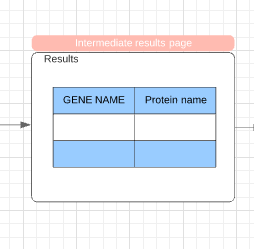

In [4]:
kinase_input = "AKT3_HUMAN"
kinase_query = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(or_(KinaseGeneName.gene_alias==kinase_input, KinaseGeneMeta.uniprot_entry==kinase_input,\
                                   KinaseGeneMeta.uniprot_number==kinase_input, KinaseGeneMeta.protein_name==kinase_input)).all()
for row in kinase_query:
    print(row.to_dict())

{'protein_name': 'RAC-gamma serine/threonine-protein kinase', 'uniprot_number': 'Q9Y243', 'uniprot_entry': 'AKT3_HUMAN', 'gene_name': 'AKT3', 'kinase_family': 'AGC Ser/Thr protein kinase family', 'gene_aliases': ['AKT3', 'PKBG']}


## Function to return the gene name, the aliases and the protein name

In [6]:
kinase_input = "AKT"
like_kin = "%{}%".format(kinase_input)
tmp = []
kinase_query = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(or_(KinaseGeneName.gene_alias.like(like_kin), KinaseGeneMeta.uniprot_entry.like(like_kin),\
                                   KinaseGeneMeta.uniprot_number.like(like_kin), KinaseGeneMeta.protein_name.like(like_kin))).all()
for meta in kinase_query:
    pprint([alias.gene_alias for alias in meta.gene_aliases])

['AKT1', 'PKB', 'RAC']
['AKT2']
['AKT3', 'PKBG']


In [7]:
kinase_input = "AKT"
like_kin = "%{}%".format(kinase_input)
tmp = []
kinase_query = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(or_(KinaseGeneName.gene_alias.like(like_kin), KinaseGeneMeta.uniprot_entry.like(like_kin),\
                                   KinaseGeneMeta.uniprot_number.like(like_kin), KinaseGeneMeta.protein_name.like(like_kin))).all()
for meta in kinase_query:
    pprint(meta.to_dict())

{'gene_aliases': ['AKT1', 'PKB', 'RAC'],
 'gene_name': 'AKT1',
 'kinase_family': 'AGC Ser/Thr protein kinase family',
 'protein_name': 'RAC-alpha serine/threonine-protein kinase',
 'uniprot_entry': 'AKT1_HUMAN',
 'uniprot_number': 'P31749'}
{'gene_aliases': ['AKT2'],
 'gene_name': 'AKT2',
 'kinase_family': 'AGC Ser/Thr protein kinase family',
 'protein_name': 'RAC-beta serine/threonine-protein kinase',
 'uniprot_entry': 'AKT2_HUMAN',
 'uniprot_number': 'P31751'}
{'gene_aliases': ['AKT3', 'PKBG'],
 'gene_name': 'AKT3',
 'kinase_family': 'AGC Ser/Thr protein kinase family',
 'protein_name': 'RAC-gamma serine/threonine-protein kinase',
 'uniprot_entry': 'AKT3_HUMAN',
 'uniprot_number': 'Q9Y243'}


In [8]:
def get_gene_alias_protein_name(kinase_input):
    """
    Returns a list of dictionary.
    In the dictionary, there are gene name and protein name.
    Returns empty list when no match is found.
    >> kin = "AKT"
    >> get_gene_alias_protein_name(kin)
    [{'Gene_Name': 'AKT1', 'Gene aliases': ['AKT1', 'PKB', 'RAC'], 'Protein_Name': 'RAC-alpha serine/threonine-protein kinase'}, 
    {'Gene_Name': 'AKT2', 'Gene aliases': ['AKT2'], 'Protein_Name': 'RAC-beta serine/threonine-protein kinase'}, 
    {'Gene_Name': 'AKT3', 'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]
    >> get_gene_alias_protein_name("Q9Y243")
    [{'Gene_Name': 'AKT3', 'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]
    """
    like_kin = "%{}%".format(kinase_input)
    tmp = []
    kinase_query = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(or_(KinaseGeneName.gene_alias.like(like_kin), KinaseGeneMeta.uniprot_entry.like(like_kin),\
                                   KinaseGeneMeta.uniprot_number.like(like_kin), KinaseGeneMeta.protein_name.like(like_kin))).all()
    for meta in kinase_query:
        results = {}
        results["Gene_Name"] = meta.to_dict()["gene_name"]
        results["Gene aliases"] = meta.to_dict()["gene_aliases"]
        results["Protein_Name"] = meta.to_dict()["protein_name"]
        tmp.append(results)
    return tmp
kin = "AKT"
uni_num = "Q9Y243"
print(get_gene_alias_protein_name(kin))
print(get_gene_alias_protein_name(uni_num))

[{'Gene_Name': 'AKT1', 'Gene aliases': ['AKT1', 'PKB', 'RAC'], 'Protein_Name': 'RAC-alpha serine/threonine-protein kinase'}, {'Gene_Name': 'AKT2', 'Gene aliases': ['AKT2'], 'Protein_Name': 'RAC-beta serine/threonine-protein kinase'}, {'Gene_Name': 'AKT3', 'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]
[{'Gene_Name': 'AKT3', 'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]


## Function to return gene aliases and protein name

In [9]:
def get_aliases_protein_name(kinase_input):
    """
    Returns a list of dictionary.
    In the dictionary, there are gene name and protein name.
    Returns empty list when no match is found.
    >> kin = "AKT"
    >> get_aliases_protein_name(kin)
    [{'Gene aliases': ['AKT1', 'PKB', 'RAC'], 'Protein_Name': 'RAC-alpha serine/threonine-protein kinase'}, 
    {'Gene aliases': ['AKT2'], 'Protein_Name': 'RAC-beta serine/threonine-protein kinase'}, 
    {'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]
    [{'Gene_Name': 'AKT3', 'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]
    >> get_aliases_protein_name("Q9Y243")
    [{'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]
    """
    like_kin = "%{}%".format(kinase_input)
    tmp = []
    kinase_query = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(or_(KinaseGeneName.gene_alias.like(like_kin), KinaseGeneMeta.uniprot_entry.like(like_kin),\
                                   KinaseGeneMeta.uniprot_number.like(like_kin), KinaseGeneMeta.protein_name.like(like_kin))).all()
    for meta in kinase_query:
        results = {}
        #results["Gene_Name"] = meta.to_dict()["gene_name"]
        results["Gene aliases"] = meta.to_dict()["gene_aliases"]
        results["Protein_Name"] = meta.to_dict()["protein_name"]
        tmp.append(results)
    return tmp
kin = "AKT"
uni_num = "Q9Y243"
print(get_aliases_protein_name(kin))
print(get_aliases_protein_name(uni_num))

[{'Gene aliases': ['AKT1', 'PKB', 'RAC'], 'Protein_Name': 'RAC-alpha serine/threonine-protein kinase'}, {'Gene aliases': ['AKT2'], 'Protein_Name': 'RAC-beta serine/threonine-protein kinase'}, {'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]
[{'Gene aliases': ['AKT3', 'PKBG'], 'Protein_Name': 'RAC-gamma serine/threonine-protein kinase'}]


# Individual kinase page

The following section documents the creation of function for individual kinase. There will be multiple functions for this section.

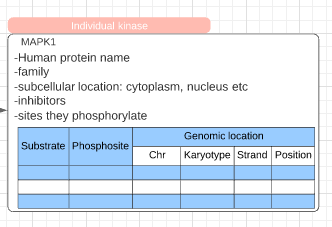

## Function to return gene name, family, protein name, uniprot entry, uniprot number

In [10]:
kinase = "AKT3"
kinase = s.query(KinaseGeneMeta).filter(KinaseGeneMeta.gene_name==kinase).one()
kinase.to_dict()

{'protein_name': 'RAC-gamma serine/threonine-protein kinase',
 'uniprot_number': 'Q9Y243',
 'uniprot_entry': 'AKT3_HUMAN',
 'gene_name': 'AKT3',
 'kinase_family': 'AGC Ser/Thr protein kinase family',
 'gene_aliases': ['AKT3', 'PKBG']}

In [12]:
def get_gene_metadata_from_gene(kinase_str):
    """
    Takes in a gene name as a string then output a dictionary.
    >> get_gene_metadata_from_gene("MAPK1")
    {'gene_name': 'MAPK1', 
    'kinase_family': 'CMGC Ser/Thr protein kinase family',
    'protein_name': 'Mitogen-activated protein kinase 1',
    'uniprot_entry': 'MK01_HUMAN',
    'uniprot_number': 'P28482'}
    """
    kinase_obj = s.query(KinaseGeneMeta).filter(KinaseGeneMeta.gene_name==kinase_str).one()
    return kinase_obj.to_dict()
pprint(get_gene_metadata_from_gene("MAPK1"))

{'gene_aliases': ['MAPK1', 'ERK2', 'PRKM1', 'PRKM2'],
 'gene_name': 'MAPK1',
 'kinase_family': 'CMGC Ser/Thr protein kinase family',
 'protein_name': 'Mitogen-activated protein kinase 1',
 'uniprot_entry': 'MK01_HUMAN',
 'uniprot_number': 'P28482'}


## Function to return subcellular location of kinase

In [17]:
kinase = "ALPK1"
kinase_query = s.query(KinaseSubcellularLocation).join(KinaseGeneMeta).join(KinaseGeneName).\
filter(KinaseGeneName.gene_alias==kinase).filter(KinaseGeneMeta.gene_name==KinaseGeneName.gene_name).\
filter(KinaseGeneMeta.gene_name==KinaseSubcellularLocation.gene_name).all()
for row in kinase_query:
    print(row.subcellular_location)

Cytosol
Cytoplasm


In [20]:
def get_subcellular_location_from_gene(kinase_gene):
    """
    Returns a list of dictionary.
    The dictionary has the gene as the key and the subcellular location in the list.
    >> get_subcellular_location_from_gene('MAPK1')
    {'Gene_Name': 'MAPK1', 'Subcellular_Locations': ['Cytoplasm', 'Cytoskeleton', 'Membrane', 'Nucleus', 'Caveola', 
    'Microtubule Organizing Center', 'Spindle', 'Plasma Membrane', 'Mitotic Spindle', 'Focal Adhesion', 'Cytosol', 
    'Golgi Apparatus', 'Late Endosome', 'Early Endosome', 'Mitochondrion', 'Azurophil Granule Lumen', 'Nucleoplasm', 
    'Extracellular Region', 'Cell', 'Pseudopodium', 'Perikaryon', 'Protein-Containing Complex', 'Dendrite Cytoplasm', 
    'Axon', 'Postsynaptic Density']}
    """
    tmp = []
    results = {}
    results["Gene_Name"] = kinase_gene
    kinase_query = s.query(KinaseSubcellularLocation).join(KinaseGeneMeta).join(KinaseGeneName).\
    filter(KinaseGeneName.gene_alias==kinase_gene).filter(KinaseGeneMeta.gene_name==KinaseGeneName.gene_name).\
    filter(KinaseGeneMeta.gene_name==KinaseSubcellularLocation.gene_name).all()
    for row in kinase_query:
        tmp.append(row.subcellular_location)
    results["Subcellular_Locations"] = tmp
    return results
print(get_subcellular_location_from_gene('MAPK1'))

{'Gene_Name': 'MAPK1', 'Subcellular_Locations': ['Cytoplasm', 'Cytoskeleton', 'Membrane', 'Nucleus', 'Caveola', 'Microtubule Organizing Center', 'Spindle', 'Plasma Membrane', 'Mitotic Spindle', 'Focal Adhesion', 'Cytosol', 'Golgi Apparatus', 'Late Endosome', 'Early Endosome', 'Mitochondrion', 'Azurophil Granule Lumen', 'Nucleoplasm', 'Extracellular Region', 'Cell', 'Pseudopodium', 'Perikaryon', 'Protein-Containing Complex', 'Dendrite Cytoplasm', 'Axon', 'Postsynaptic Density']}


## Function to return the inhibitors from a kinase

In [24]:
def get_inhibitors_from_gene(kinase_gene):
    """
    Take a string and return a list of dictionaries.
    Returns empty list if there are no inhibitors.
    >> get_inhibitors_from_gene("SGK1")
    ['GSK650394A', 'SGK-Sanofi-14i','SGK1-Sanofi-14g', 'SGK1-Sanofi-14h', 'SGK1-Sanofi-14n']
    """
    results = []
    kinase_query = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(KinaseGeneMeta.gene_name==KinaseGeneName.gene_name).\
    filter(KinaseGeneName.gene_alias==kinase_gene).all()
    if len(kinase_query) == 0:
        return []
    for inhibitor in kinase_query[-1].inhibitors:
        results.append(inhibitor.inhibitor)
    return results
kinase = "SGK1"
get_inhibitors_from_gene(kinase)
# get_inhibitors_from_gene("empty")

['GSK650394A',
 'SGK-Sanofi-14i',
 'SGK1-Sanofi-14g',
 'SGK1-Sanofi-14h',
 'SGK1-Sanofi-14n']

## Function to return substrates and phosphosites from a kinase

In [29]:
#the codes return the substrates that are phosphosrylated by the kinase
kinase_gene = "JAK2"
kinase_obj = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(KinaseGeneName.gene_alias==kinase_gene).\
filter(KinaseGeneMeta.gene_name==KinaseGeneName.gene_name).one()
for phosphosite in kinase_obj.phosphosites:
    pprint(phosphosite.substrate.substrate_name)

'ARHGEF1'
'CCR2'
'JAK2'
'JAK2'
'JAK2'


In [31]:
tmp = {}
kinase_gene = "JAK2"
kinase_obj = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(KinaseGeneName.gene_alias==kinase_gene).\
filter(KinaseGeneMeta.gene_name==KinaseGeneName.gene_name).all()
kinase_obj = kinase_obj[-1]
for phosphosite in kinase_obj.phosphosites:
#     tmp = {}
    gene = phosphosite.substrate.substrate_name
#     print(gene)
#     print(phosphosite.to_dict())
    if gene in tmp:
        tmp[gene].append(phosphosite.to_dict())
    else:
        tmp[gene] = [phosphosite.to_dict()]
pprint(tmp)

{'ARHGEF1': [{'chromosome': 19,
              'end_position': 41905001,
              'karyotype_band': 'q13.2',
              'neighbouring_sequences': 'WDQEAQIyELVAQTV',
              'phosphosite': 'Y738',
              'phosphosite_meta_id': 1481,
              'start_position': 41904999,
              'strand': 1,
              'substrate_meta_id': 1870}],
 'CCR2': [{'chromosome': 3,
           'end_position': 46357944,
           'karyotype_band': 'p21.31',
           'neighbouring_sequences': 'ILLTIDRyLAIVHAV',
           'phosphosite': 'Y139',
           'phosphosite_meta_id': 1958,
           'start_position': 46357942,
           'strand': 1,
           'substrate_meta_id': 1869}],
 'JAK2': [{'chromosome': 9,
           'end_position': 5072560,
           'karyotype_band': 'p24.1',
           'neighbouring_sequences': 'VRREVGDyGQLHETE',
           'phosphosite': 'Y570',
           'phosphosite_meta_id': 2827,
           'start_position': 5072558,
           'strand': 1,
     

In [36]:
def get_substrates_phosphosites_from_gene(kinase_gene):
    """
    Takes in a gene name of a kinase and return a dictionary of dictionaries.
    In each dictionary (inner), the key is the substrate name; the value is a list of dictionary containing the metadata
    of phosphosites.
    Returns empty list if there are no substrates.
    >> get_substrates_phosphosites_from_gene("JAK2")
    {'ARHGEF1': [{'phosphosite': 'Y738', 'chromosome': 19, 'karyotype_band': 'q13.2', 'strand': 1, 'start_position': 41904999, 
    'end_position': 41905001, 'neighbouring_sequences': 'WDQEAQIyELVAQTV'}],...}
    >> get_substrates_phosphosites_from_gene("empty")
    []
    """
    tmp = {}
    kinase_obj = s.query(KinaseGeneMeta).join(KinaseGeneName).filter(KinaseGeneName.gene_alias==kinase_gene).\
    filter(KinaseGeneMeta.gene_name==KinaseGeneName.gene_name).all()
    if kinase_obj == []:
        return []
    kinase_obj = kinase_obj[-1]
    for phosphosite in kinase_obj.phosphosites:
        gene = phosphosite.substrate.substrate_name
        if gene in tmp:
            tmp[gene].append(phosphosite.to_dict())
        else:
            tmp[gene] = [phosphosite.to_dict()]
    return tmp
pprint(get_substrates_phosphosites_from_gene("JAK2"))
# pprint(get_substrates_phosphosites_from_gene("empty"))

{'ARHGEF1': [{'chromosome': 19,
              'end_position': 41905001,
              'karyotype_band': 'q13.2',
              'neighbouring_sequences': 'WDQEAQIyELVAQTV',
              'phosphosite': 'Y738',
              'phosphosite_meta_id': 1481,
              'start_position': 41904999,
              'strand': 1,
              'substrate_meta_id': 1870}],
 'CCR2': [{'chromosome': 3,
           'end_position': 46357944,
           'karyotype_band': 'p21.31',
           'neighbouring_sequences': 'ILLTIDRyLAIVHAV',
           'phosphosite': 'Y139',
           'phosphosite_meta_id': 1958,
           'start_position': 46357942,
           'strand': 1,
           'substrate_meta_id': 1869}],
 'JAK2': [{'chromosome': 9,
           'end_position': 5072560,
           'karyotype_band': 'p24.1',
           'neighbouring_sequences': 'VRREVGDyGQLHETE',
           'phosphosite': 'Y570',
           'phosphosite_meta_id': 2827,
           'start_position': 5072558,
           'strand': 1,
     

# Returning kinase for the substrate-phospho-inhibitor analysis page

## Dummy dataframe.

In [10]:
#making a dummy test list
import pandas as pd
sub_pho_df = pd.read_csv("new_clean_human_kinase_substrates.csv", index_col=0)
sub_pho_df.tail()

,GENE,KINASE,KIN_ACC_ID,SUBSTRATE,SUB_GENE_ID,SUB_ACC_ID,SUB_GENE,SUB_MOD_RSD,SITE_GRP_ID,SITE_+/-7_AA,DOMAIN,SUB_ENTRY_NAME,KIN_ENTRY_NAME
10975,NUAK1,NuaK1,O60285,MYPT1,4659.0,O14974,PPP1R12A,S910,1983104,sLLGRsGsysyLEER,NaN,MYPT1_HUMAN,NUAK1_HUMAN
10976,NUAK1,NuaK1,O60285,LATS1,9113.0,O95835,LATS1,S464,451855,NIPVRsNsFNNPLGN,NaN,LATS1_HUMAN,NUAK1_HUMAN
10977,ULK2,ULK2,Q8IYT8,SEC16A,9919.0,O15027,SEC16A,S846,55578720,LAQPINFsVSLSNSH,NaN,SC16A_HUMAN,ULK2_HUMAN
10978,ULK2,ULK2,Q8IYT8,DENND3,22898.0,A2RUS2,DENND3,S472,7997148,THRRMVVsMPNLQDI,NaN,DEND3_HUMAN,ULK2_HUMAN
10979,ULK2,ULK2,Q8IYT8,DENND3,22898.0,A2RUS2,DENND3,S490,23050193,ELAPRNSsLRLtDTA,NaN,DEND3_HUMAN,ULK2_HUMAN


In [11]:
#pd.concat([df1['c'], df2['c']], axis=1, keys=['df1', 'df2'])
dummy_df = pd.concat([sub_pho_df["SUB_GENE"], sub_pho_df["SUB_MOD_RSD"]], axis=1, keys=["substrate", "phosphosite"])
dummy_df.head()

,substrate,phosphosite
0,EIF2S1,S52
1,EIF2S1,S49
2,HDAC5,S259
3,PTPRA,S204
4,HNRNPK,S302


In [12]:
results = []
for i in range(len(dummy_df)):
    tmp = {
        dummy_df.iloc[i]["substrate"]: dummy_df.iloc[i]["phosphosite"]
    }
    results.append(tmp)
results

[{'EIF2S1': 'S52'},
 {'EIF2S1': 'S49'},
 {'HDAC5': 'S259'},
 {'PTPRA': 'S204'},
 {'HNRNPK': 'S302'},
 {'SHOC2': 'T71'},
 {'BLVRA': 'S237'},
 {'MUC1': 'T1224'},
 {'ADD1': 'S726'},
 {'NCF1': 'S370'},
 {'FBXO25': 'S178'},
 {'ENOX2': 'S504'},
 {'TNNI3': 'T143'},
 {'FOSL1': 'T217'},
 {'BEST1': 'S358'},
 {'RPS6KB2': 'S473'},
 {'NCF1': 'S303'},
 {'CARD9': 'T231'},
 {'ITGB2': 'T758'},
 {'PRKCD': 'T218'},
 {'LCP1': 'S5'},
 {'TRPV4': 'S162'},
 {'SQSTM1': 'S349'},
 {'KRT8': 'S74'},
 {'GAPDH': 'T246'},
 {'NRG1': 'S286'},
 {'NCF1': 'S328'},
 {'DAP3': 'S31'},
 {'STAT1': 'S727'},
 {'PRKCD': 'S503'},
 {'RPS6': 'S235'},
 {'ITGB2': 'S745'},
 {'PRKCD': 'S299'},
 {'SLC29A1': 'S281'},
 {'DAP3': 'S280'},
 {'CTTN': 'S405'},
 {'DAB2': 'S24'},
 {'PTPN22': 'S35'},
 {'PRKD1': 'S742'},
 {'PRKCD': 'S302'},
 {'BLVRA': 'S230'},
 {'PRKCD': 'S645'},
 {'DAP3': 'T237'},
 {'PRKCD': 'S304'},
 {'PRKCD': 'T295'},
 {'SMPD1': 'S510'},
 {'HIST1H3A': 'T45'},
 {'CHAT': 'S476'},
 {'CYBA': 'T147'},
 {'PTPRA': 'S180'},
 {'TP53': 'S

In [18]:
res = {}
for dict in results:
    for key in dict.keys():
        if key in res:
            res[key].append(dict[key])
        else:
            res[key] = [dict[key]]
pprint(res)

{nan: ['S77',
       'T9',
       'S438',
       'S455',
       'S438',
       'S234',
       'T783',
       'S436',
       'S427',
       'S446',
       'S427',
       'S108',
       'S161',
       'S350',
       'T347',
       'S357',
       'S350',
       'T347',
       'S357',
       'S39',
       'Y74'],
 'AAK1': ['T389'],
 'AARS2': ['T673'],
 'AATF': ['T366', 'S510', 'S143', 'S477', 'S189'],
 'ABCA1': ['S1255', 'T1243', 'T1242', 'S1042', 'S2054', 'S2054'],
 'ABCB1': ['S667', 'S671', 'S683', 'S661', 'S667', 'S671'],
 'ABCC1': ['T249'],
 'ABCF1': ['S140', 'S109'],
 'ABCG2': ['T362'],
 'ABI1': ['S410',
          'T394',
          'S392',
          'S216',
          'T265',
          'S183',
          'S225',
          'S267',
          'S216',
          'Y213',
          'S410',
          'T394',
          'S392',
          'S216',
          'T265',
          'S183',
          'S225',
          'S267'],
 'ABL1': ['Y488',
          'T735',
          'Y393',
          'Y412',
        

 'FXN': ['Y118'],
 'FXR1': ['S420'],
 'FXYD1': ['S83', 'S88', 'S83', 'S88', 'T89'],
 'FYB1': ['Y651',
          'Y625',
          'Y771',
          'Y559',
          'Y595',
          'Y755',
          'Y757',
          'Y571',
          'Y780'],
 'FYN': ['Y28',
         'S21',
         'Y531',
         'Y30',
         'Y28',
         'Y39',
         'Y214',
         'Y185',
         'Y213',
         'Y420',
         'Y420'],
 'FYTTD1': ['T205'],
 'FZR1': ['S40', 'S163', 'T121', 'S151', 'S40', 'S163', 'T121'],
 'G3BP1': ['S149', 'Y133', 'Y56'],
 'G6PD': ['S210', 'T266', 'Y507', 'Y428'],
 'GAB1': ['Y242',
          'Y373',
          'Y317',
          'Y627',
          'Y259',
          'T476',
          'Y627',
          'Y242',
          'Y447',
          'Y472',
          'Y659',
          'Y373',
          'Y285',
          'Y589',
          'Y627',
          'Y406',
          'Y447',
          'Y472',
          'Y659',
          'Y373',
          'Y285',
          'Y589',
          

 'PCBP2': ['S272', 'S173', 'S189', 'T213', 'S272', 'S173', 'S189', 'T213'],
 'PCF11': ['S120', 'T121'],
 'PCGF6': ['S30'],
 'PCM1': ['S372'],
 'PCNA': ['Y133', 'Y250', 'Y60', 'Y211'],
 'PCNT': ['T1221', 'S1241', 'T1209', 'S1235'],
 'PDCD10': ['T43', 'S39', 'T43', 'S39'],
 'PDCD4': ['S457', 'S76', 'S67', 'S67', 'S457'],
 'PDCD5': ['S119'],
 'PDCL': ['S296', 'S25', 'S19', 'S18', 'S20'],
 'PDE10A': ['T16'],
 'PDE11A': ['S117', 'S162'],
 'PDE3A': ['S428',
           'S312',
           'S292',
           'S428',
           'S293',
           'S312',
           'S438',
           'S492',
           'S465'],
 'PDE3B': ['S318', 'S296', 'S73'],
 'PDE4A': ['S145'],
 'PDE4B': ['S133', 'S659', 'S487'],
 'PDE4C': ['S13', 'S535'],
 'PDE4D': ['S13', 'S126', 'S126', 'S54', 'S579', 'S490', 'S413', 'S579'],
 'PDE5A': ['S102', 'S102'],
 'PDGFRA': ['Y754', 'Y1018', 'Y988', 'Y572', 'Y574'],
 'PDGFRB': ['Y1021',
            'Y1009',
            'Y579',
            'Y562',
            'Y740',
            'Y7

 'THRAP3': ['Y344', 'Y107', 'Y68', 'Y118', 'T874'],
 'THRB': ['S142', 'Y406', 'S142'],
 'TIAM1': ['S329', 'S334', 'T340', 'S231'],
 'TICAM2': ['S16'],
 'TICRR': ['T1898', 'S1045', 'S865', 'S1894', 'S1001', 'T969'],
 'TIFA': ['T9', 'T9'],
 'TIGIT': ['Y225', 'Y225'],
 'TINF2': ['S396', 'S295', 'S330'],
 'TIRAP': ['Y106', 'Y187', 'Y86'],
 'TK1': ['S13', 'S13'],
 'TKT': ['T382', 'S387'],
 'TLE1': ['S239', 'S253'],
 'TLK1': ['S743', 'S679'],
 'TLK2': ['S686'],
 'TLN1': ['S425'],
 'TLR3': ['Y759', 'Y858'],
 'TLR4': ['S790'],
 'TLR5': ['S805'],
 'TMEM173': ['S358', 'S366'],
 'TMIGD2': ['S220'],
 'TMOD1': ['S2', 'T54'],
 'TMPO': ['S424'],
 'TNFAIP1': ['S278', 'S280'],
 'TNFAIP3': ['S381'],
 'TNFRSF1A': ['S381'],
 'TNK1': ['S502'],
 'TNK2': ['Y635', 'Y860', 'Y859', 'Y284'],
 'TNKS': ['T982', 'S978', 'S991', 'S987'],
 'TNKS1BP1': ['S691'],
 'TNNI3': ['T143',
           'S23',
           'S24',
           'S23',
           'S150',
           'S24',
           'S39',
           'S23',
           '

## Function to return a kinase using a substrate and a phosphosite

The following code documents how I get to the functions to return a kinase when given a substrate and a phosphosite. In progress.

In [ ]:
sub="PRKD3"
pho="S731"
sub_pho_query = s.query(SubstrateMeta).join(PhosphositeMeta).filter(or_(SubstrateMeta.substrate_name==sub,\
                                                                           SubstrateMeta.substrate_gene_name==sub,\
                                                                           SubstrateMeta.substrate_uniprot_entry==sub,\
                                                                           SubstrateMeta.substrate_uniprot_number==sub)).\
                                                                filter(and_(PhosphositeMeta.substrate_meta_id==SubstrateMeta.substrate_id,\
                                                                           PhosphositeMeta.phosphosite==pho)).all()
# sub_pho_query
for row in sub_pho_query:
    for phosphosite in row.phosphosites:
        for item in phosphosite.kinases:
            pprint(item.gene_name)

In [ ]:
#working steps
sub="RRN3"
pho="T200"
sub_pho_query = s.query(SubstrateMeta).join(PhosphositeMeta).filter(or_(SubstrateMeta.substrate_name==sub,\
                                                                           SubstrateMeta.substrate_gene_name==sub,\
                                                                           SubstrateMeta.substrate_uniprot_entry==sub,\
                                                                           SubstrateMeta.substrate_uniprot_number==sub)).\
                                                                filter(and_(PhosphositeMeta.substrate_meta_id==SubstrateMeta.substrate_id,\
                                                                           PhosphositeMeta.phosphosite==pho)).all()
sub_pho_query
# for row in sub_pho_query:
#     for phosphosite in row.phosphosites:
#         for item in phosphosite.kinases:
#             pprint(item.gene_name)

In [ ]:
#the following code returns a kinase when taking in a substrate and a phosphosite
sub="RRN3"
pho="T200"
sub_pho_query = s.query(PhosphositeMeta).join(SubstrateMeta).filter(PhosphositeMeta.phosphosite==pho).\
filter(SubstrateMeta.substrate_id==PhosphositeMeta.substrate_meta_id).\
filter(SubstrateMeta.substrate_gene_name==sub).all()
for phosphosite in sub_pho_query:
    for kinase in phosphosite.kinases:
        print(kinase.gene_name)

In [54]:
#improving on the algorithm above
#the code now takes in either the substrate name, substrate gene name, substrate uniprot entry name, substrate entry number
#sub="RRN3"
#sub="TIF1A"
#sub="RRN3_HUMAN"
sub="Q9NYV6"
pho="T200"
sub_pho_query = s.query(PhosphositeMeta).join(SubstrateMeta).filter(PhosphositeMeta.phosphosite==pho).\
filter(SubstrateMeta.substrate_id==PhosphositeMeta.substrate_meta_id).\
filter(or_(SubstrateMeta.substrate_gene_name==sub, SubstrateMeta.substrate_name==sub,\
           SubstrateMeta.substrate_uniprot_entry==sub, SubstrateMeta.substrate_uniprot_number==sub)).all()
for phosphosite in sub_pho_query:
    for kinase in phosphosite.kinases:
        pprint(kinase.gene_name)

'CSNK2A1'


In [58]:
#create a function that takes in two parameters: a substrate and a phosphosite number
#The function should return a kinase a string
def get_kinase_from_substrate_phosphosite(sub, pho):
    """
    Take in two parameters: a substrate and a phosphosite number.
    Substrate is either the substrate name, substrate gene name, substrate uniprot entry name, 
    substrate uniprot entry number.
    Return a kinase string.
    Returns empty list if there are no match found
    >> get_kinase_from_substrate_phosphosite("RRN3_HUMAN", "T200")
    CSNK2A1
    """
    sub_pho_query = s.query(PhosphositeMeta).join(SubstrateMeta).filter(PhosphositeMeta.phosphosite==pho).\
    filter(SubstrateMeta.substrate_id==PhosphositeMeta.substrate_meta_id).\
    filter(or_(SubstrateMeta.substrate_gene_name==sub, SubstrateMeta.substrate_name==sub,\
               SubstrateMeta.substrate_uniprot_entry==sub, SubstrateMeta.substrate_uniprot_number==sub)).all()
    if sub_pho_query == []:
        return []
    for phosphosite in sub_pho_query:
        for kinase in phosphosite.kinases:
            return kinase.gene_name
print(get_kinase_from_substrate_phosphosite("RRN3_HUMAN", "T200"))
print(get_kinase_from_substrate_phosphosite("empty", "T200"))
print(get_kinase_from_substrate_phosphosite("RRN3", "empty"))

CSNK2A1
[]
[]


## Function to return kinase with substrate and phosphosite

In [61]:
#create a function that takes in substrate and phosphosite
#return a dictionary
#dictionary contains the kinase, substrate and phosphosite
def get_kinase_substrate_phosphosite(sub, pho):
    """(str, str) --> dictionary
    Take in two parameters: a substrate and a phosphosite number.
    Substrate is either the substrate name, substrate gene name, substrate uniprot entry name, 
    substrate uniprot entry number.
    Return a dictionary.
    Returns empty list if there are no match found.
    Each dictionary contains the kinase, substrate and phosphosite.
    >> get_kinase_substrate_phosphosite("RRN3_HUMAN", "T200")
    {'kinase': 'CSNK2A1', 'substrate': 'RRN3_HUMAN', 'phosphosite': 'T200'}
    >> get_kinase_substrate_phosphosite("empty", "T200")
    []
    """
    tmp = {}
    sub_pho_query = s.query(PhosphositeMeta).join(SubstrateMeta).filter(PhosphositeMeta.phosphosite==pho).\
    filter(SubstrateMeta.substrate_id==PhosphositeMeta.substrate_meta_id).\
    filter(or_(SubstrateMeta.substrate_gene_name==sub, SubstrateMeta.substrate_name==sub,\
               SubstrateMeta.substrate_uniprot_entry==sub, SubstrateMeta.substrate_uniprot_number==sub)).all()
    if sub_pho_query == []:
        return []
    for phosphosite in sub_pho_query:
        for kinase in phosphosite.kinases:
            tmp["kinase"] = kinase.gene_name
            tmp["substrate"] = sub
            tmp["phosphosite"] = pho
    return tmp
print(get_kinase_substrate_phosphosite("RRN3_HUMAN", "T200"))
print(get_kinase_substrate_phosphosite("empty", "T200"))
print(get_kinase_substrate_phosphosite("RRN3_HUMAN", "empty"))

{'kinase': 'CSNK2A1', 'substrate': 'RRN3_HUMAN', 'phosphosite': 'T200'}
[]
[]


# Additional functions which might come in handy 

## Function to return the meta details of inhibitor from a gene

In [4]:
kinase="SGK1"
kinase_query = s.query(KinaseGeneName).filter(KinaseGeneName.gene_alias==kinase).all()
for inhibitor in kinase_query[-1].inhibitors:
    pprint(inhibitor.to_dict())


{'empirical_formula': 'C25H22N2O2',
 'images_url': 'http://www.kinase-screen.mrc.ac.uk/system/files/compounds/jpg/gsk-50394_5.jpg',
 'inhibitor': 'GSK650394A',
 'inhibitor_id': 1,
 'kinases': ['SGK1'],
 'molecular_weight': 382.45}
{'empirical_formula': 'C18H15ClN6O3S',
 'images_url': 'http://www.kinase-screen.mrc.ac.uk/system/files/compounds/jpg/SGK1-Sanofi-14i.jpg',
 'inhibitor': 'SGK-Sanofi-14i',
 'inhibitor_id': 2,
 'kinases': ['SGK1'],
 'molecular_weight': 430.87}
{'empirical_formula': 'C17H12Cl2N6O2S',
 'images_url': 'http://www.kinase-screen.mrc.ac.uk/system/files/compounds/jpg/SGK1-Sanofi--14g.jpg',
 'inhibitor': 'SGK1-Sanofi-14g',
 'inhibitor_id': 3,
 'kinases': ['SGK1'],
 'molecular_weight': 435.29}
{'empirical_formula': 'C17H12Cl2N6O2S',
 'images_url': 'http://www.kinase-screen.mrc.ac.uk/system/files/compounds/jpg/SGK1-Sanofi-14h_0.jpg',
 'inhibitor': 'SGK1-Sanofi-14h',
 'inhibitor_id': 4,
 'kinases': ['SGK1'],
 'molecular_weight': 435.29}
{'empirical_formula': 'C17H12CIFN6O2

In [8]:
def get_inhibitor_meta_from_gene(kinase):
    """
    Take in a kinase gene name and return a list of dictionaries.
    Returns empty list if there is not inhibitor for the kinase.
    >> kinase = "SGK1"
    >> get_inhibitor_meta_from_gene(kinase)
    [{'inhibitor_id': 1,
    'inhibitor': 'GSK650394A',
    'molecular_weight': 382.45,
    'images_url': 'http://www.kinase-screen.mrc.ac.uk/system/files/compounds/jpg/gsk-50394_5.jpg',
    'empirical_formula': 'C25H22N2O2',
    'kinases': [{'gene_name': 'SGK1', 'gene_alias': 'SGK1'}]},...]
    """
    results = []
    kinase_query = s.query(KinaseGeneName).filter(KinaseGeneName.gene_alias==kinase).all()
    for inhibitor in kinase_query[-1].inhibitors:
        results.append(inhibitor.to_dict())
    return results
kinase = "SGK1"
get_inhibitor_meta_from_gene(kinase)

[{'inhibitor_id': 1,
  'inhibitor': 'GSK650394A',
  'molecular_weight': 382.45,
  'images_url': 'http://www.kinase-screen.mrc.ac.uk/system/files/compounds/jpg/gsk-50394_5.jpg',
  'empirical_formula': 'C25H22N2O2',
  'kinases': [{'gene_name': 'SGK1', 'gene_alias': 'SGK1'}]},
 {'inhibitor_id': 2,
  'inhibitor': 'SGK-Sanofi-14i',
  'molecular_weight': 430.87,
  'images_url': 'http://www.kinase-screen.mrc.ac.uk/system/files/compounds/jpg/SGK1-Sanofi-14i.jpg',
  'empirical_formula': 'C18H15ClN6O3S',
  'kinases': [{'gene_name': 'SGK1', 'gene_alias': 'SGK1'}]},
 {'inhibitor_id': 3,
  'inhibitor': 'SGK1-Sanofi-14g',
  'molecular_weight': 435.29,
  'images_url': 'http://www.kinase-screen.mrc.ac.uk/system/files/compounds/jpg/SGK1-Sanofi--14g.jpg',
  'empirical_formula': 'C17H12Cl2N6O2S',
  'kinases': [{'gene_name': 'SGK1', 'gene_alias': 'SGK1'}]},
 {'inhibitor_id': 4,
  'inhibitor': 'SGK1-Sanofi-14h',
  'molecular_weight': 435.29,
  'images_url': 'http://www.kinase-screen.mrc.ac.uk/system/files/

In [4]:
inhibitors = s.query(Inhibitor).all()
for inhibitor in inhibitors:
    pprint(inhibitor.to_dict())

{'empirical_formula': 'C25H22N2O2',
 'images_url': 'http://www.kinase-screen.mrc.ac.uk/system/files/compounds/jpg/gsk-50394_5.jpg',
 'inhibitor': 'GSK650394A',
 'inhibitor_id': 1,
 'kinases': {'SGK1': ['SGK1']},
 'molecular_weight': 382.45}
{'empirical_formula': 'C18H15ClN6O3S',
 'images_url': 'http://www.kinase-screen.mrc.ac.uk/system/files/compounds/jpg/SGK1-Sanofi-14i.jpg',
 'inhibitor': 'SGK-Sanofi-14i',
 'inhibitor_id': 2,
 'kinases': {'SGK1': ['SGK1']},
 'molecular_weight': 430.87}
{'empirical_formula': 'C17H12Cl2N6O2S',
 'images_url': 'http://www.kinase-screen.mrc.ac.uk/system/files/compounds/jpg/SGK1-Sanofi--14g.jpg',
 'inhibitor': 'SGK1-Sanofi-14g',
 'inhibitor_id': 3,
 'kinases': {'SGK1': ['SGK1']},
 'molecular_weight': 435.29}
{'empirical_formula': 'C17H12Cl2N6O2S',
 'images_url': 'http://www.kinase-screen.mrc.ac.uk/system/files/compounds/jpg/SGK1-Sanofi-14h_0.jpg',
 'inhibitor': 'SGK1-Sanofi-14h',
 'inhibitor_id': 4,
 'kinases': {'SGK1': ['SGK1']},
 'molecular_weight': 435.